In [1]:
import os
import tensorflow as tf
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
directory = os.getcwd()
filename = 'best_SMDD_weights.h5'
filepath = os.path.join(directory, filename)


In [2]:
stimulus = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/inpfull_op50_SF.npz')
Y_full = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/Yfull_op50_SF.npz')

In [4]:
stimulus_concat = np.concatenate([stimulus['arr_0'], stimulus['arr_1'], stimulus['arr_2'], stimulus['arr_3'], stimulus['arr_4'], stimulus['arr_5'], stimulus['arr_6']], axis =1)

In [5]:
stimulus_concat = stimulus_concat.T

In [6]:
#import AVA data from all cells
SMDD_0_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_0_df.csv')
SMDD_1_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_1_df.csv') 
SMDD_2_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_2_df.csv')
SMDD_3_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_3_df.csv') 
SMDD_4_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_4_df.csv') 
SMDD_5_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_5_df.csv') 
SMDD_6_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_6_df.csv')

In [7]:
SMDD_0 = np.array(SMDD_0_df.iloc[:, 1: -2])
SMDD_1 = np.array(SMDD_1_df.iloc[:, 1: -3])
SMDD_2 = np.array(SMDD_2_df.iloc[:, 1: -3])
SMDD_3 = np.array(SMDD_3_df.iloc[:, 1: -3])
SMDD_4 = np.array(SMDD_4_df.iloc[:, 1: -3])
SMDD_5 = np.array(SMDD_5_df.iloc[:, 1: -3])
SMDD_6 = np.array(SMDD_6_df.iloc[:, 1: -3])

In [8]:
SMDD_all = np.concatenate([SMDD_0, SMDD_1, SMDD_2, SMDD_3, SMDD_4, SMDD_5, SMDD_6], axis = 0)

In [9]:
SMDD_all.shape

(12, 1600)

In [10]:
#seperate stim 1 and stim 0, 
SMDD_stim_0 = np.concatenate([SMDD_0, SMDD_1, SMDD_6], axis = 0)
SMDD_stim_1 = np.concatenate([SMDD_2, SMDD_3, SMDD_4, SMDD_5], axis = 0)




In [11]:
def get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins=10, nsamples=10):
    response_vector = []
    stimulus_vector = []
    for _ in range(nsamples):
        r = response[cell_idx, start_idx: start_idx + bin_size]
        response_vector.append(np.average(r))
        print('response', response_vector)

        bin_stimuli = []
        for i in range(num_bins):
           
            end_idx = (start_idx ) - (i * bin_size)
            print('start_idx', start_idx)
            print('end', end_idx)
            start_idx_bin = end_idx + bin_size
            print('start_idx_bin', start_idx_bin)

            # Check if the calculated index is within the bounds
            if start_idx_bin < 0:
                break

            # Append the average of stimulus over the bin
            bin_stimuli.append(np.average(stimulus[0, end_idx:start_idx_bin]))
            print('stim', stimulus[0, start_idx_bin:end_idx])
            print('bin_stimuli', bin_stimuli)

        # Collect all averages per sample
        stimulus_vector.append(bin_stimuli)
        print('stimulus_vector', stimulus_vector)

        # Update start index for the next sample
        start_idx += bin_size

    # Convert list of lists into a 2D NumPy array
    stimulus_matrix = np.array(stimulus_vector)  # Transpose to match expected dimensions

    return stimulus_matrix, np.array(response_vector)

In [12]:
stim_0 = stimulus_concat[0, :].reshape(1600, 1)

In [13]:
stim_0.shape

(1600, 1)

In [14]:
stim_1 = stimulus_concat[2, :].reshape(1600, 1)

In [15]:
all_data_stim0 = []
all_labels_stim0 = []

bin_size = 10
start_idx = 200  # Starting index for the stimulus and response extraction
num_bins = 7
nsamples = 50 #amount of times you're moving over the data

stimulus = stim_0.T
response = SMDD_stim_0
cell_idx = 0 #cell in response
# Calculate data and labels for each cell or half the cells
num_cells = response.shape[0]  # or response.shape[0] // 2 for half of the cells
for cell_idx in range(num_cells):
    data, label = get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins, nsamples)
    all_data_stim0.append(data)
    all_labels_stim0.append(label)

response [0.07117485056611272]
start_idx 200
end 200
start_idx_bin 210
stim []
bin_stimuli [0.0]
start_idx 200
end 190
start_idx_bin 200
stim []
bin_stimuli [0.0, 1.0]
start_idx 200
end 180
start_idx_bin 190
stim []
bin_stimuli [0.0, 1.0, 1.0]
start_idx 200
end 170
start_idx_bin 180
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0]
start_idx 200
end 160
start_idx_bin 170
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0]
start_idx 200
end 150
start_idx_bin 160
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
start_idx 200
end 140
start_idx_bin 150
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
stimulus_vector [[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]]
response [0.07117485056611272, 0.05989778048550254]
start_idx 210
end 210
start_idx_bin 220
stim []
bin_stimuli [0.0]
start_idx 210
end 200
start_idx_bin 210
stim []
bin_stimuli [0.0, 0.0]
start_idx 210
end 190
start_idx_bin 200
stim []
bin_stimuli [0.0, 0.0, 1.0]
start_idx 210
end 180
start_idx_bin 190
stim []
bin_stimuli [0.0, 0.0, 1.0, 1.0]
st

In [16]:
all_data__stim0_array = np.concatenate(all_data_stim0, axis=0)

# Convert list of 1D arrays to a single 2D array (if all_labels consists of 1D arrays)
all_labels__stim0_array = np.concatenate(all_labels_stim0, axis=0)

In [17]:
all_data_stim1 = []
all_labels_stim1 = []

bin_size = 10
start_idx = 200  # Starting index for the stimulus and response extraction
num_bins = 7
nsamples = 100 #amount of times you're moving over the data

stimulus = stim_1.T
response = SMDD_stim_1
cell_idx = 0 #cell in response
# Calculate data and labels for each cell or half the cells
num_cells = response.shape[0]  # or response.shape[0] // 2 for half of the cells
for cell_idx in range(num_cells):
    data, label = get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins, nsamples)
    all_data_stim1.append(data)
    all_labels_stim1.append(label)

response [0.03376159420304022]
start_idx 200
end 200
start_idx_bin 210
stim []
bin_stimuli [0.0]
start_idx 200
end 190
start_idx_bin 200
stim []
bin_stimuli [0.0, 1.0]
start_idx 200
end 180
start_idx_bin 190
stim []
bin_stimuli [0.0, 1.0, 1.0]
start_idx 200
end 170
start_idx_bin 180
stim []
bin_stimuli [0.0, 1.0, 1.0, 0.0]
start_idx 200
end 160
start_idx_bin 170
stim []
bin_stimuli [0.0, 1.0, 1.0, 0.0, 0.0]
start_idx 200
end 150
start_idx_bin 160
stim []
bin_stimuli [0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
start_idx 200
end 140
start_idx_bin 150
stim []
bin_stimuli [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
stimulus_vector [[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]]
response [0.03376159420304022, 0.03386041522542245]
start_idx 210
end 210
start_idx_bin 220
stim []
bin_stimuli [0.0]
start_idx 210
end 200
start_idx_bin 210
stim []
bin_stimuli [0.0, 0.0]
start_idx 210
end 190
start_idx_bin 200
stim []
bin_stimuli [0.0, 0.0, 1.0]
start_idx 210
end 180
start_idx_bin 190
stim []
bin_stimuli [0.0, 0.0, 1.0, 1.0]
st

In [18]:
all_data__stim1_array = np.concatenate(all_data_stim1, axis=0)

# Convert list of 1D arrays to a single 2D array (if all_labels consists of 1D arrays)
all_labels__stim1_array = np.concatenate(all_labels_stim1, axis=0)

In [19]:
all_data__stim1_array.shape

(700, 7)

In [20]:
#concatenate both stimuli
all_data_array = np.concatenate([all_data__stim0_array, all_data__stim1_array], axis = 0)
all_labels_array = np.concatenate([all_labels__stim0_array, all_labels__stim1_array], axis = 0) 

In [21]:
S, Y = all_data_array, all_labels_array 

 

In [22]:
D = 7

In [23]:
def make_linear_model(D, optimizer):
    input_layer = Input((D,))
    linear_layer = Dense(1)(input_layer)
    output_layer = Activation('sigmoid')(linear_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    return model

In [24]:
def run_jackknife_models(S, Y):

    patience = 3 # early stopping
    epochs = 1000 # max number of cycles to train
    all_best_weights = []

    sq1, sq2, sq3, sq4 = np.array_split(S, 4)
    yq1, yq2, yq3, yq4 = np.array_split(Y, 4)

    j1 = {
    'S_train': np.concatenate((sq2, sq3, sq4), axis=0),
    'S_valid': sq1,
    'Y_train': np.concatenate((yq2, yq3, yq4), axis=0),
    'Y_valid': yq1
}
    j2 = {
    'S_train': np.concatenate((sq1, sq3, sq4), axis=0),
    'S_valid': sq2,
    'Y_train': np.concatenate((yq1, yq3, yq4), axis=0),
    'Y_valid': yq2
}
    j3 = {
    'S_train': np.concatenate((sq1, sq2, sq4), axis=0),
    'S_valid': sq3,
    'Y_train': np.concatenate((yq1, yq2, yq4), axis=0),
    'Y_valid': yq3
}
    j4 = {
    'S_train': np.concatenate((sq1, sq2, sq3), axis=0),
    'S_valid': sq4,
    'Y_train': np.concatenate((yq1, yq2, yq3), axis=0),
    'Y_valid': yq4
}

    jackknives = [j1, j2, j3, j4]

    for i, jackknife in enumerate(jackknives):
        S_train = jackknife['S_train']
        S_valid = jackknife['S_valid']
        Y_train = jackknife['Y_train']
        Y_valid = jackknife['Y_valid']

 
        adam_optimizer = Adam(learning_rate=0.001)
        best_weights = []
        
    # Creating the model with the optimizer passed as an argument
        model = make_linear_model(S_train.shape[1], adam_optimizer)

    # Setting up callbacks
        filepath = f'jackknives_h5/best_lin_SMDD_weights_{i}.weights.h5' 
        callbacks = [
                EarlyStopping(patience=patience, min_delta=1e-5, monitor='val_loss', verbose=1),
                ModelCheckpoint(filepath=filepath, save_weights_only=True, save_best_only=True, verbose=1)
        ]

    # Training the model
        H = model.fit(S_train, Y_train, epochs=epochs, callbacks=callbacks, validation_data=(S_valid, Y_valid), verbose=2)
        print(model.summary())
        model.load_weights(filepath)#loads the best weights from the training
        best_weights.append(model.get_weights()) #retreives best weights from load_weights callback
    
        all_best_weights.append(best_weights)

    return all_best_weights

In [ ]:
def run_models(S, Y, num_models=4, global_seed = 24):
    np.random.seed(global_seed)
    test_size = 0.25
    patience = 3
    epochs = 1000
    all_best_weights = []
    
    
    
    
    for i in range(num_models):
        seed = np.random.randint(0, 1000)  # Random seed for each iteration
        adam_optimizer = Adam(learning_rate=0.001)
        best_weights = []
        # Splitting the dataset
        S_train, S_valid, Y_train, Y_valid = train_test_split(S, Y, test_size=test_size, random_state=seed)

    # Creating the model with the optimizer passed as an argument
        model = make_linear_model(S_train.shape[1], adam_optimizer)

    # Setting up callbacks
        filepath = f'best_weights_SMDD{i}.weights.h5' 
        callbacks = [
                EarlyStopping(patience=patience, min_delta=1e-5, monitor='val_loss', verbose=1),
                ModelCheckpoint(filepath=filepath, save_weights_only=True, save_best_only=True, verbose=1)
        ]

    # Training the model
        H = model.fit(S_train, Y_train, epochs=epochs, callbacks=callbacks, validation_data=(S_valid, Y_valid), verbose=2)
        print(model.summary())
        model.load_weights(filepath)#loads the best weights from the training
        best_weights.append(model.get_weights()) #retreives best weights from load_weights callback
    
        all_best_weights.append(best_weights)

    return all_best_weights

In [25]:
all_best_weights = run_jackknife_models(S, Y)

Epoch 1/1000


2024-07-29 10:26:52.887367: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-29 10:26:52.887477: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-29 10:26:52.887514: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-29 10:26:52.887981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-29 10:26:52.888036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-29 10:26:53.248768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.69005, saving model to best_weights_0.weights.h5
23/23 - 1s - 34ms/step - loss: 0.7229 - val_loss: 0.6900
Epoch 2/1000

Epoch 2: val_loss improved from 0.69005 to 0.67423, saving model to best_weights_0.weights.h5
23/23 - 0s - 8ms/step - loss: 0.7049 - val_loss: 0.6742
Epoch 3/1000

Epoch 3: val_loss improved from 0.67423 to 0.65976, saving model to best_weights_0.weights.h5
23/23 - 0s - 8ms/step - loss: 0.6889 - val_loss: 0.6598
Epoch 4/1000

Epoch 4: val_loss improved from 0.65976 to 0.64721, saving model to best_weights_0.weights.h5
23/23 - 0s - 8ms/step - loss: 0.6746 - val_loss: 0.6472
Epoch 5/1000

Epoch 5: val_loss improved from 0.64721 to 0.63630, saving model to best_weights_0.weights.h5
23/23 - 0s - 8ms/step - loss: 0.6621 - val_loss: 0.6363
Epoch 6/1000

Epoch 6: val_loss improved from 0.63630 to 0.62698, saving model to best_weights_0.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6511 - val_loss: 0.6270
Epoch 7/1000

Epoch 7: val_loss 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18 (76.00 B)

None
Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.63788, saving model to best_weights_1.weights.h5
23/23 - 1s - 26ms/step - loss: 0.6759 - val_loss: 0.6379
Epoch 2/1000

Epoch 2: val_loss improved from 0.63788 to 0.61773, saving model to best_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6618 - val_loss: 0.6177
Epoch 3/1000

Epoch 3: val_loss improved from 0.61773 to 0.60070, saving model to best_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6494 - val_loss: 0.6007
Epoch 4/1000

Epoch 4: val_loss improved from 0.60070 to 0.58546, saving model to best_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6390 - val_loss: 0.5855
Epoch 5/1000

Epoch 5: val_loss improved from 0.58546 to 0.57164, saving model to best_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6300 - val_loss: 0.5716
Epoch 6/1000

Epoch 6: val_loss improved from 0.57164 to 0.55964, saving model to best_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6221 - val_loss: 0.5596
Epoch 7/1000



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18 (76.00 B)

None
Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.60018, saving model to best_weights_2.weights.h5
23/23 - 1s - 33ms/step - loss: 0.5469 - val_loss: 0.6002
Epoch 2/1000

Epoch 2: val_loss improved from 0.60018 to 0.59921, saving model to best_weights_2.weights.h5
23/23 - 0s - 8ms/step - loss: 0.5450 - val_loss: 0.5992
Epoch 3/1000

Epoch 3: val_loss improved from 0.59921 to 0.59854, saving model to best_weights_2.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5434 - val_loss: 0.5985
Epoch 4/1000

Epoch 4: val_loss improved from 0.59854 to 0.59783, saving model to best_weights_2.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5419 - val_loss: 0.5978
Epoch 5/1000

Epoch 5: val_loss improved from 0.59783 to 0.59728, saving model to best_weights_2.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5406 - val_loss: 0.5973
Epoch 6/1000

Epoch 6: val_loss improved from 0.59728 to 0.59677, saving model to best_weights_2.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5395 - val_loss: 0.5968
Epoch 7/1000



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18 (76.00 B)

None
Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.72539, saving model to best_weights_3.weights.h5
23/23 - 1s - 27ms/step - loss: 0.7409 - val_loss: 0.7254
Epoch 2/1000

Epoch 2: val_loss improved from 0.72539 to 0.70498, saving model to best_weights_3.weights.h5
23/23 - 0s - 7ms/step - loss: 0.7172 - val_loss: 0.7050
Epoch 3/1000

Epoch 3: val_loss improved from 0.70498 to 0.68676, saving model to best_weights_3.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6958 - val_loss: 0.6868
Epoch 4/1000

Epoch 4: val_loss improved from 0.68676 to 0.67033, saving model to best_weights_3.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6764 - val_loss: 0.6703
Epoch 5/1000

Epoch 5: val_loss improved from 0.67033 to 0.65576, saving model to best_weights_3.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6590 - val_loss: 0.6558
Epoch 6/1000

Epoch 6: val_loss improved from 0.65576 to 0.64288, saving model to best_weights_3.weights.h5
23/23 - 0s - 8ms/step - loss: 0.6435 - val_loss: 0.6429
Epoch 7/1000



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18 (76.00 B)

None


In [26]:
SMDD_weights = np.concatenate([
    all_best_weights[0][0][0],
    all_best_weights[1][0][0],
    all_best_weights[2][0][0],
    all_best_weights[3][0][0]
], axis=1)



In [27]:
SMDD_weights

array([[-0.13237503, -0.27002373, -0.28776315, -0.16337907],
       [-0.24160588, -0.3786864 , -0.2832762 , -0.5044445 ],
       [-0.48801804,  0.03515695, -0.40168756,  0.21696718],
       [ 0.03350943, -0.44574198, -0.10583351, -0.77473   ],
       [-0.6137147 , -0.20167367, -0.4080666 ,  0.2526426 ],
       [ 0.10077815,  0.1948093 ,  0.05081095, -0.36421934],
       [-0.10009958, -0.4923499 , -0.24503587, -0.12219176]],
      dtype=float32)

In [28]:
mean_SMDD = np.average(SMDD_weights, axis =1)

In [29]:
mean_SMDD

array([-0.21338525, -0.35200325, -0.15939538, -0.32319903, -0.24270308,
       -0.00445523, -0.23991929], dtype=float32)

In [30]:
SMDD_weights_df = pd.DataFrame(SMDD_weights)
SMDD_weights_df.columns = ['Jackknife 1', 'Jackknife 2', 'Jackknife 3', 'Jackknife 4']

In [31]:
SMDD_weights_df['Average'] = mean_SMDD

In [41]:
SMDD_weights_df

,Jackknife 1,Jackknife 2,Jackknife 3,Jackknife 4,Average
0,-0.132375,-0.270024,-0.287763,-0.163379,-0.213385
1,-0.241606,-0.378686,-0.283276,-0.504444,-0.352003
2,-0.488018,0.035157,-0.401688,0.216967,-0.159395
3,0.033509,-0.445742,-0.105834,-0.774730,-0.323199
4,-0.613715,-0.201674,-0.408067,0.252643,-0.242703
5,0.100778,0.194809,0.050811,-0.364219,-0.004455
6,-0.100100,-0.492350,-0.245036,-0.122192,-0.239919


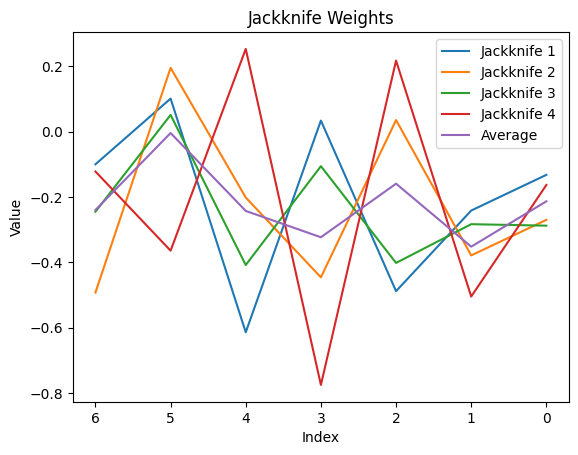

In [42]:
for column in SMDD_weights_df.columns:
    plt.plot(SMDD_weights_df.index, SMDD_weights_df[column], label=column)

# Adding title and labels
plt.title('Jackknife Weights')
plt.xlabel('Index')
plt.ylabel('Value')
plt.gca().invert_xaxis()

# Adding a legend
plt.legend()

# Showing the plot
plt.show()

In [34]:
std_dev = SMDD_weights_df[['Jackknife 1', 'Jackknife 2', 'Jackknife 3', 'Jackknife 4']].std(axis=1)


In [35]:
sem = std_dev / np.sqrt(4)

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_49709/1770871266.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x=SMDD_weights_df.index, y=mean_SMDD, yerr=sem, fmt='-o', label='Average with SEM', ecolor='red', capsize=5, linestyle='-', marker='o', color='blue')
/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_49709/1770871266.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=SMDD_weights_df.index, y=mean_SMDD, yerr=sem, fmt='-o', label='Average with SEM', ecolor='red', capsize=5, linestyle='-', marker='o', color='blue')


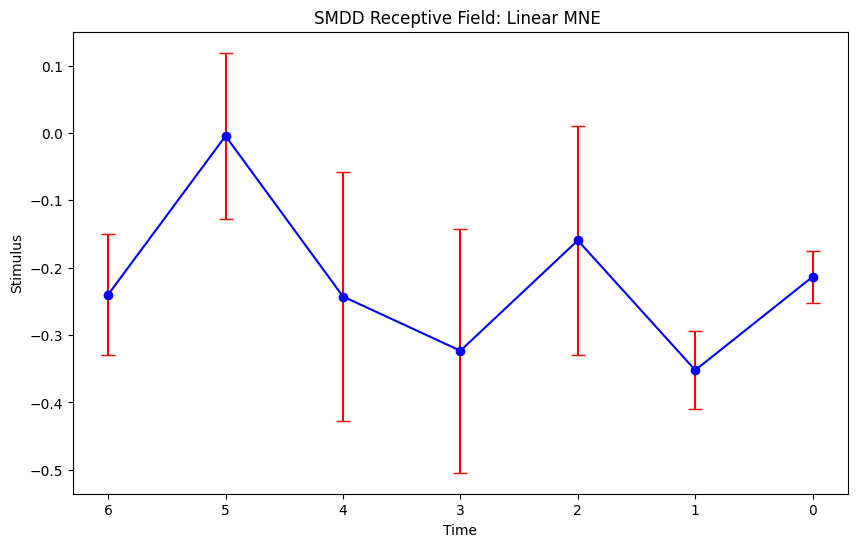

In [50]:
plt.figure(figsize=(10, 6))
plt.errorbar(x=SMDD_weights_df.index, y=mean_SMDD, yerr=sem, fmt='-o', label='Average with SEM', ecolor='red', capsize=5, linestyle='-', marker='o', color='blue')
plt.title('SMDD Receptive Field: Linear MNE ')
plt.xlabel('Time')
plt.ylabel('Stimulus')
plt.gca().invert_xaxis()

plt.show()

In [44]:
#calculate variance of weights 
def calculate_dots(w,s):
    dots = []
    for i in range(s.shape[0]):
        dot = np.dot(w, s[i])
        dots.append(dot)
    return dots

In [46]:
var = calculate_dots(w = mean_SMDD, s= S)

In [47]:
np.var(var)

0.13433733277472196

In [48]:
mean = np.mean(var)
mean

-0.5201626996617568

In [49]:
std = np.std(var)
std

0.36652057619555545